# Análise de Microdados ENEM 2019

## Importação de dados

In [1]:
#Pacotes Utilizados
import pandas as pd         #biblioteca de código aberto para análise e manipulação de dados
import matplotlib as mpl    #biblioteca para criar visualizações

Devido a limitação de hardware, foi utilizado uma método diferente do usual para importar os dados. 
Com a hipótese formulada, podemos filtrar quais colunas vamos utilizar para investigação através do argumento usecols, economizando processamento e memória do computador. 
Outra alternativa seria diminuir o tamanho do dataset através das linhas com o argumento nrows.

In [2]:
caminho = "D:\ARQUIVOS\MICRODADOS_ENEM_2019.csv"    #path para importação de arquivos
colunas = ['NO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'SG_UF_RESIDENCIA', 'IN_GESTANTE', 'TP_SEXO']    #colunas selecionadas para importação
microdadosEnem = pd.read_csv(caminho, sep=';', encoding='ISO-8859-1', usecols=colunas) #microdados armazenado como data frame

In [3]:
#uma vez que os dados foram importados para a variável microdadosEnem, podemos visualizar as primeiras linhas do nosso data frame
microdadosEnem.head() #Método que mostra as primeiras do data frame.

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE
0,Sorocaba,SP,36.0,M,0
1,Feira de Santana,BA,23.0,M,0
2,Fortaleza,CE,39.0,F,0
3,Palmas,TO,25.0,F,0
4,Contagem,MG,22.0,F,0


## Análisando os dados

Primeiramente, gostaria de saber quantos participantes existe por município. Cada linha do nosso data frame corresponde a um participante, portanto, contar o número de ocorrências de cada município vai responder a primeira pergunta. 

In [4]:
coluna_no_municipio_residencia = microdadosEnem['NO_MUNICIPIO_RESIDENCIA'] #Armazeno a coluna que contém o nome do município de residência em uma nova variável

In [5]:
coluna_no_municipio_residencia.value_counts() #O método value_counts() faz o trabalho de contar o número de ocorrências de cada município.

São Paulo                   229837
Rio de Janeiro              137762
Brasília                     94352
Fortaleza                    93959
Salvador                     88557
                             ...  
Canudos do Vale                  9
Monte Santo do Tocantins         9
Sério                            8
Araguainha                       6
Forquetinha                      5
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [6]:
coluna_no_municipio_residencia.value_counts().sort_index() #Acrescentando o método sort_index(), a contagem de municípios será apresentada em ordem alfabética.

Abadia de Goiás         283
Abadia dos Dourados     140
Abadiânia               280
Abaetetuba             6821
Abaeté                  495
                       ... 
Áurea                    68
Ângulo                   44
Érico Cardoso           127
Óbidos                 1313
Óleo                     46
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [7]:
#Vou aplicar o mesmo processo, mas dessa vez para a coluna idade.
coluna_nu_idade = microdadosEnem['NU_IDADE']

In [8]:
coluna_nu_idade.value_counts()

18.0    864186
17.0    847303
19.0    577161
20.0    409385
16.0    316437
         ...  
85.0         2
88.0         1
94.0         1
92.0         1
87.0         1
Name: NU_IDADE, Length: 82, dtype: int64

In [9]:
coluna_nu_idade.value_counts().sort_index()

10.0       6
11.0       9
12.0      46
13.0     266
14.0    5267
        ... 
87.0       1
88.0       1
91.0       2
92.0       1
94.0       1
Name: NU_IDADE, Length: 82, dtype: int64

As células acima trouxeram os primeiros insights da análise. Com a contagem de ocorrências, descobrimos que a idade da maioria dos participantes é 18 anos. 

Com o método sort_index() apresentando os dados em ordem crescente, descobrimos que existem pessoas relativamente novas e de idade avançada que realizaram a a prova do enem em 2019.

Para facilitar a visualização, podemos plotar um gráfico de histograma.

<AxesSubplot:>

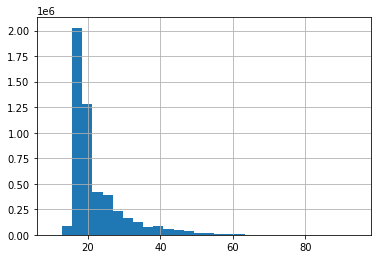

In [10]:
coluna_nu_idade.hist(bins=30) #.hist() plota o gráfico de histograma. O argumento bins aumenta o número de colunas do gráfico, resultando em uma melhor visualização.

In [11]:
#Agora, vamos investigar o número de participantes por estado
coluna_sg_uf_residencia = microdadosEnem['SG_UF_RESIDENCIA']

In [12]:
coluna_sg_uf_residencia.value_counts() #Aqui, descobrimos que o Estado com maior e menor frequência de participantes são Sâo Paulo e Roraima, respectivamente. 

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

<AxesSubplot:>

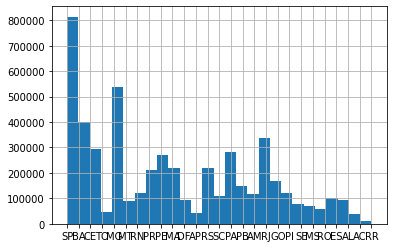

In [13]:
coluna_sg_uf_residencia.hist(bins=27)

Uma informação que gostaria de saber é o percentual de gestantes que realizaram o enem em 2019...

In [14]:
coluna_in_gestante = microdadosEnem['IN_GESTANTE']

In [15]:
distInGestante = coluna_in_gestante.value_counts() 

In [16]:
distInGestante #O resultado para esse contagem retorna 0 e 1, sendo 0 = falso e 1 = verdadeiro, ou seja, gestantes.

0    5093860
1       1410
Name: IN_GESTANTE, dtype: int64

In [17]:
percentInGestante = [100 * x / distInGestante.sum() for x in distInGestante]

In [18]:
percentInGestante

[99.97232727608154, 0.027672723918457705]

O resultado foi que aproximadamente 99,97% dos candidatos não são gestantes, enquanto aproximadamente 0,02% são gestantes. Entretanto, esse cálculo foi realizado em relação ao total de candidatos. A informação que procuramos talvez fosse mais precisa se o cálculo fosse em relação ao número de candidatas do sexo feminino.

In [20]:
coluna_tp_sexo = microdadosEnem['TP_SEXO']

In [21]:
distTpSexo = coluna_tp_sexo.value_counts()

In [22]:
distTpSexo #O resultado de pessoas que declaram o sexo feminino ou masculino nessa edição do enem.

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

In [23]:
percentTpSexo = [100*x/distTpSexo.sum() for x in distTpSexo]

In [24]:
percentTpSexo #o resultado apresentando como percentual. O maior percentual é do sexo feminino.

[59.50267601128105, 40.49732398871895]

In [25]:
sexoFeminino = distTpSexo[0]        #Número de candidatas do sexo feminino
nu_gestantes = distInGestante[1]    #Número de gestantes

In [27]:
percentGestantes = 100*nu_gestantes/sexoFeminino

In [28]:
percentGestantes #Esse é o resultado que procuramos. O percentual de gestantes em relação ao total de candidatas do sexo feminino.

0.04650668805754427

In [29]:
percentNaoGestantes = 100 - percentGestantes 

In [30]:
percentNaoGestantes #Para completar, o percentual de não gestantes.

99.95349331194245